In [ ]:
 from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install sk-video

     |████████████████████████████████| 2.3MB 6.7MB/s 


In [ ]:
import numpy as np
import cv2 # extract frames from the videos
from PIL import Image  # to manipulate images
import os

from keras.applications import vgg16
from keras.preprocessing.image import load_img,img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import skvideo.io
from skvideo.measure import scenedet

In [ ]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

553467904/553467096 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [ ]:
frames = []
path = "/content/gdrive/MyDrive/BLKBOX_VIDEO/video/HoV_CreativeWorkshopConcept1Liveaction_V33386_7_English_Portrait&IMG=PR.mp4"

videodata = skvideo.io.vread(path)
print(videodata.shape)

scenes = scenedet(videodata, method='histogram', parameter1=None, min_scene_length=5)
print(scenes)


(210, 900, 600, 3)
[  0  32  60 150 161 168 197]


In [ ]:
list(scenes)[0:7]

[0, 32, 60, 150, 161, 168, 197]

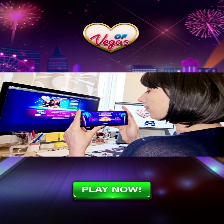

************************************


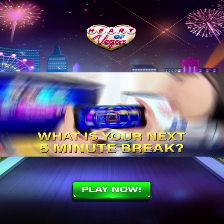

************************************


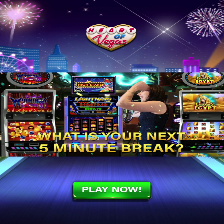

************************************


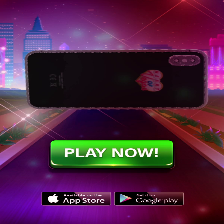

************************************


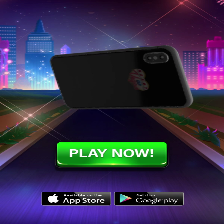

************************************


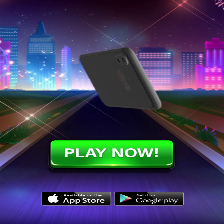

************************************


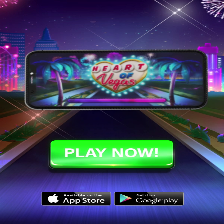

************************************


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

frames = []

frame_no = list(scenes)[0:7]
cap = cv2.VideoCapture(path) #video_name is the video being called
for i in frame_no:
  cap.set(1,i); # Where frame_no is the frame you want
  ret, frame = cap.read() # Read the frame
  frame = cv2.resize(frame,(224,224))
  cv2_imshow(frame) # show frame on window
  frames.append(frame)
  print('************************************')
#If you want to hold the window, until you press exit:
video = np.stack(frames, axis=0)

In [ ]:
video.shape

(7, 224, 224, 3)

In [ ]:
# extract the images features

imgs_features = feat_extractor.predict(video)

print("features successfully extracted!")
imgs_features.shape

features successfully extracted!


(7, 4096)

In [ ]:
flatten_img_features = imgs_features.flatten()
flatten_img_features_ = np.expand_dims(flatten_img_features,axis = 0)
flatten_img_features_.shape

(1, 28672)

In [ ]:
frames = []
path = "/content/gdrive/MyDrive/BLKBOX_VIDEO/video/HoV_CreativeWorkshopConcept1Liveaction_V33388_7_English_Landscape&IMG=P.mp4"

videodata = skvideo.io.vread(path)
print(videodata.shape)

scenes = scenedet(videodata, method='histogram', parameter1=None, min_scene_length=5)
print(scenes)

(210, 720, 1280, 3)
[  0  31  89 100 150 161 168 188 197]


In [ ]:
list(scenes)[0:7]

[0, 31, 89, 100, 150, 161, 168]

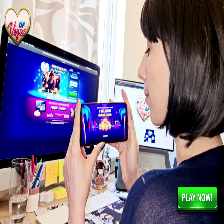

************************************


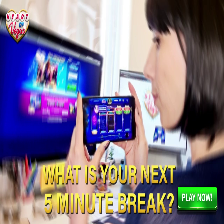

************************************


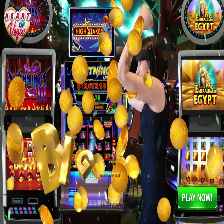

************************************


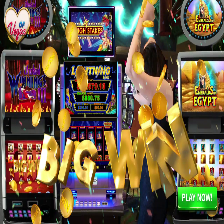

************************************


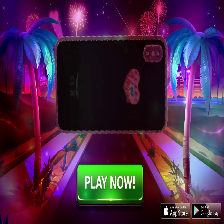

************************************


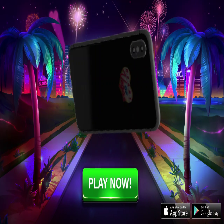

************************************


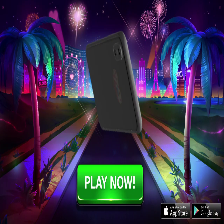

************************************


In [ ]:
frames = []

frame_no = list(scenes)[0:7]
cap = cv2.VideoCapture(path) #video_name is the video being called
for i in frame_no:
  cap.set(1,i); # Where frame_no is the frame you want
  ret, frame = cap.read() # Read the frame
  frame = cv2.resize(frame,(224,224))
  cv2_imshow(frame) # show frame on window
  frames.append(frame)
  print('************************************')
#If you want to hold the window, until you press exit:
video = np.stack(frames, axis=0)

In [ ]:
video.shape

(7, 224, 224, 3)

In [ ]:
# extract the images features

imgs_features1 = feat_extractor.predict(video)

print("features successfully extracted!")
imgs_features1.shape

features successfully extracted!


(7, 4096)

In [ ]:
flatten_img_features1 = imgs_features1.flatten()
flatten_img_features_1 = np.expand_dims(flatten_img_features1,axis=0)
flatten_img_features_1.shape

(1, 28672)

In [ ]:
import scipy

ml = max(len(flatten_img_features),len(flatten_img_features1))
A = np.concatenate((flatten_img_features , np.zeros(ml-len(flatten_img_features))))
B = np.concatenate((flatten_img_features1 , np.zeros(ml-len(flatten_img_features1))))
from scipy.spatial import distance as dis
result = dis.euclidean(A,B)
result2 = 1 - dis.cosine(flatten_img_features,flatten_img_features1)
result3 = dis.jaccard(A,B)

print(result)
print(result2)
print(result3)

295.2415954375126
0.45544683933258057
1.0


In [ ]:
arr = np.concatenate((flatten_img_features_, flatten_img_features_1), axis=0)
arr.shape

(2, 28672)

In [ ]:
cosSimilarities = cosine_similarity(arr)

In [ ]:
cosSimilarities

array([[0.99999976, 0.45544657],
       [0.45544657, 0.9999992 ]], dtype=float32)